In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
np.random.seed(42)
data = np.random.rand(5, 3)
data

array([[0.37454012, 0.95071431, 0.73199394],
       [0.59865848, 0.15601864, 0.15599452],
       [0.05808361, 0.86617615, 0.60111501],
       [0.70807258, 0.02058449, 0.96990985],
       [0.83244264, 0.21233911, 0.18182497]])

In [3]:
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)
data_standardized

array([[-0.51154143,  1.31491696,  0.64425338],
       [ 0.30841528, -0.73584035, -1.17636352],
       [-1.66932533,  1.09676143,  0.23057173],
       [ 0.70871634, -1.08533586,  1.39625714],
       [ 1.16373513, -0.59050218, -1.09471874]])

In [4]:
covariance_matrix = np.cov(data_standardized, rowvar=False)
covariance_matrix

array([[ 1.25      , -1.04670348, -0.3404206 ],
       [-1.04670348,  1.25      ,  0.27416587],
       [-0.3404206 ,  0.27416587,  1.25      ]])

In [5]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print(eigenvalues)
print(eigenvectors)

[2.4537255  0.20100754 1.09526696]
[[-0.67001308  0.71338339  0.20534511]
 [ 0.66000875  0.6990729  -0.27511004]
 [ 0.33981014  0.04879775  0.93922726]]


In [6]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [7]:
num_components = 2
selected_eigenvectors = eigenvectors[:, :num_components]

In [8]:
projected_data = np.dot(data_standardized, selected_eigenvectors)

In [9]:
pca = PCA(n_components=num_components)
projected_data_sklearn = pca.fit_transform(data_standardized)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [11]:

iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)


print("Explained Variance Ratio:", pca.explained_variance_ratio_)



Explained Variance Ratio: [0.72962445 0.22850762]


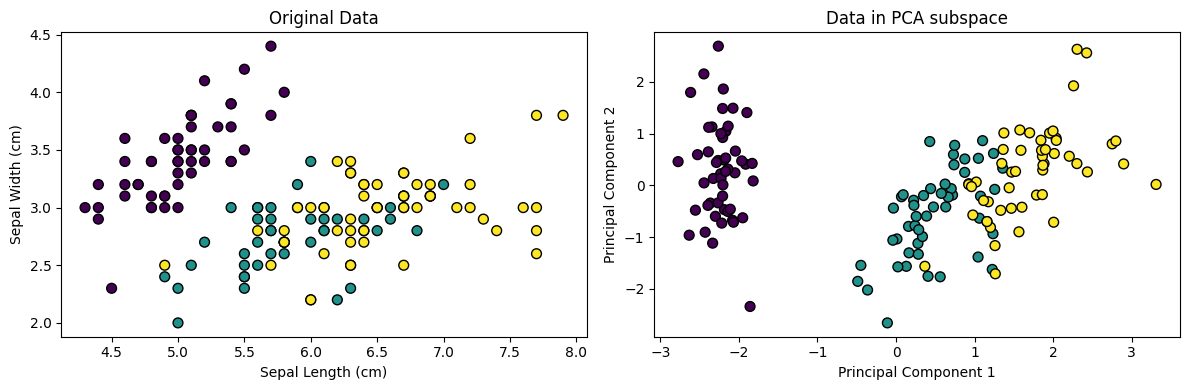

In [12]:

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('Original Data')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('Data in PCA subspace')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

In [13]:
import pandas as pd

In [14]:
df=pd.read_csv("Housing.csv")


In [15]:
X=df.drop(['price'],axis=1)

In [26]:
X1=pd.get_dummies(X)

In [27]:
y=df['price']

In [28]:
X1

,lotsize,bedrooms,bathrms,stories,garagepl,driveway_no,driveway_yes,recroom_no,recroom_yes,fullbase_no,fullbase_yes,gashw_no,gashw_yes,airco_no,airco_yes,prefarea_no,prefarea_yes
0,5850,3,1,2,1,False,True,True,False,False,True,True,False,True,False,True,False
1,4000,2,1,1,0,False,True,True,False,True,False,True,False,True,False,True,False
2,3060,3,1,1,0,False,True,True,False,True,False,True,False,True,False,True,False
3,6650,3,1,2,0,False,True,False,True,True,False,True,False,True,False,True,False
4,6360,2,1,1,0,False,True,True,False,True,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,4800,3,2,4,0,False,True,False,True,True,False,True,False,False,True,True,False
542,6000,3,2,4,0,False,True,True,False,True,False,True,False,False,True,True,False
543,6000,3,2,4,1,False,True,False,True,True,False,True,False,False,True,True,False
544,6000,3,2,2,1,False,True,False,True,True,False,True,False,False,True,True,False


In [29]:

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X1)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)


print("Explained Variance Ratio:", pca.explained_variance_ratio_)



Explained Variance Ratio: [0.21220707 0.14462059]


In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
from sklearn.model_selection import KFold,GridSearchCV

In [32]:


lr=LinearRegression()
kfold=KFold(n_splits=5,shuffle=True,random_state=23)

params={}

gcv = GridSearchCV(lr, param_grid=params,cv=kfold, scoring='r2')
gcv.fit(X1, y)
print(gcv.best_params_)
print(gcv.best_score_)
bm_rf=gcv.best_estimator_


{}
0.6494120332827326


without PCA 

In [33]:
df=pd.read_csv("Housing.csv")
X2=pd.get_dummies(X,drop_first=True)
y=df['price']

In [34]:

lr=LinearRegression()
kfold=KFold(n_splits=5,shuffle=True,random_state=23)

params={}

gcv = GridSearchCV(lr, param_grid=params,cv=kfold, scoring='r2')
gcv.fit(X2, y)
print(gcv.best_params_)
print(gcv.best_score_)
bm_rf=gcv.best_estimator_


{}
0.6494120332827324


In [35]:
print(gcv.get_params())

{'cv': KFold(n_splits=5, random_state=23, shuffle=True), 'error_score': nan, 'estimator__copy_X': True, 'estimator__fit_intercept': True, 'estimator__n_jobs': None, 'estimator__positive': False, 'estimator': LinearRegression(), 'n_jobs': None, 'param_grid': {}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': False, 'scoring': 'r2', 'verbose': 0}


In [37]:
print(lr.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [43]:

prcomp = PCA()
comps = prcomp.fit_transform(m_scaled)

In [47]:
print(X2.var())
print(prcomp.explained_variance_)
tot_var = np.sum(prcomp.explained_variance_)
prop_var = np.array(prcomp.explained_variance_)/tot_var
print(prop_var)
per_var = prop_var*100

lotsize         4.700912e+06
bedrooms        5.437410e-01
bathrms         2.521625e-01
stories         7.537756e-01
garagepl        7.418490e-01
driveway_yes    1.213597e-01
recroom_yes     1.463622e-01
fullbase_yes    2.278624e-01
gashw_yes       4.377121e-02
airco_yes       2.168532e-01
prefarea_yes    1.798031e-01
dtype: float64


NameError: name 'prop_var' is not defined

In [49]:
import seaborn as sns 

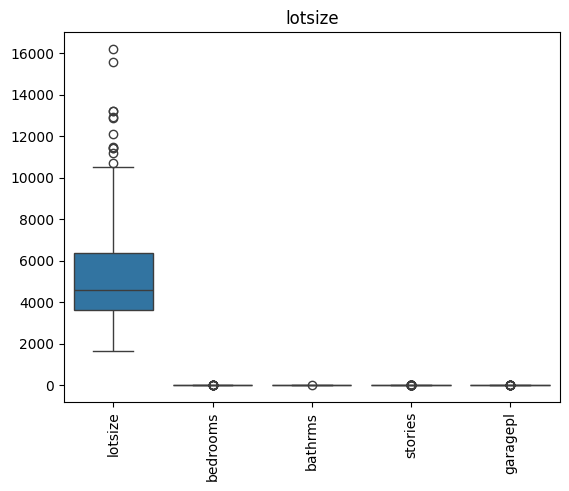

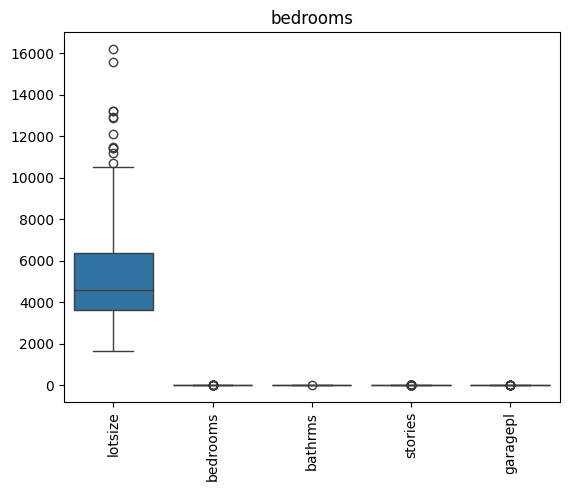

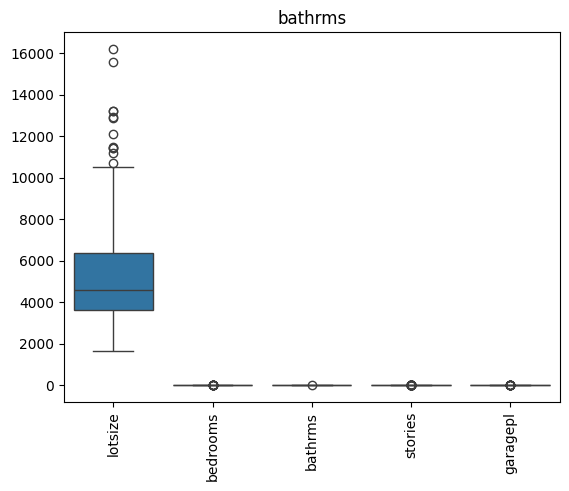

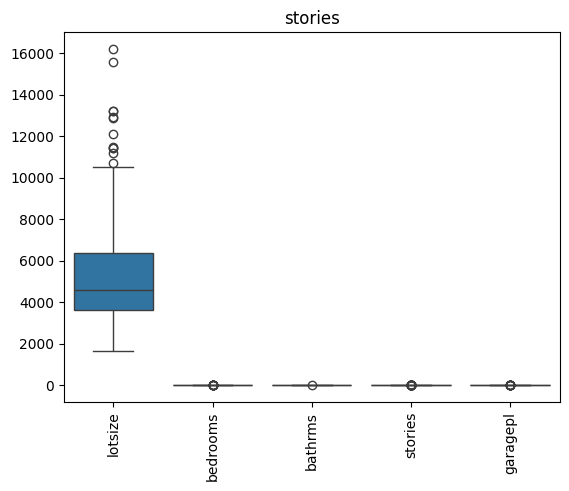

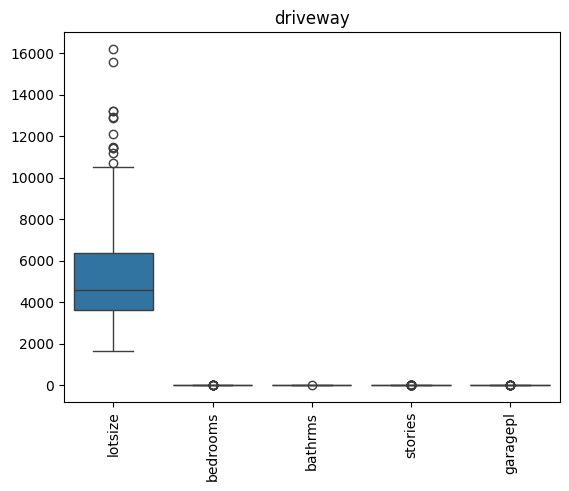

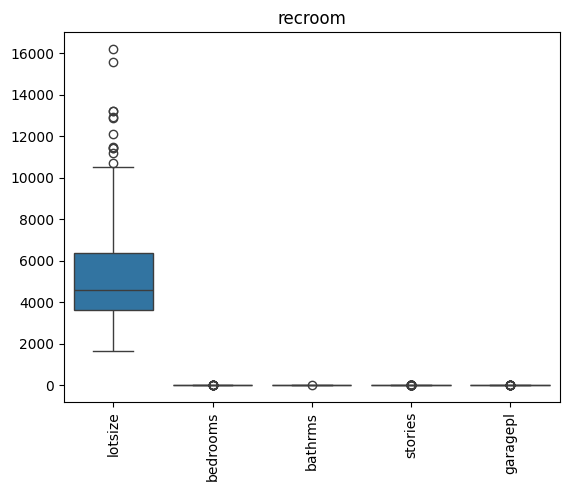

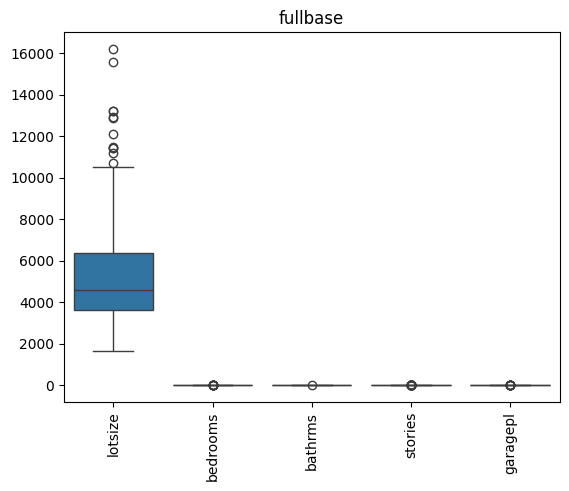

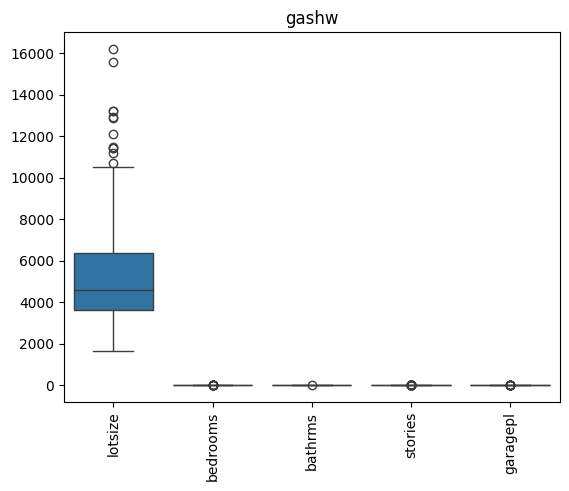

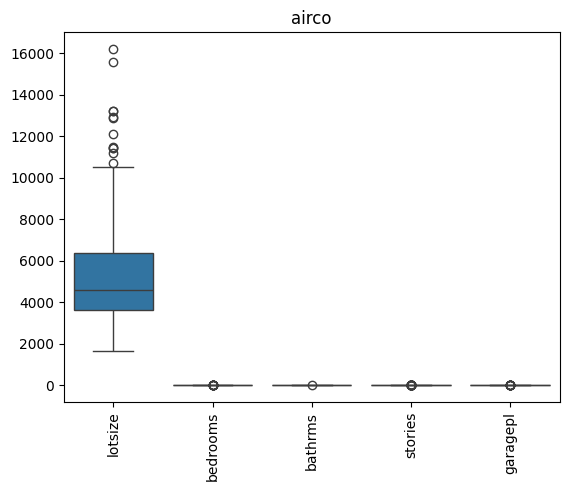

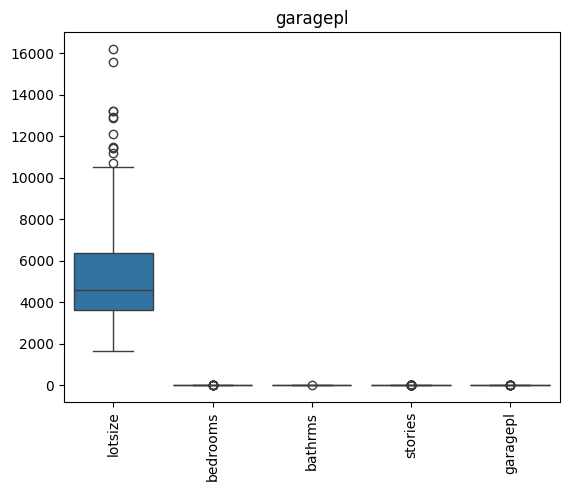

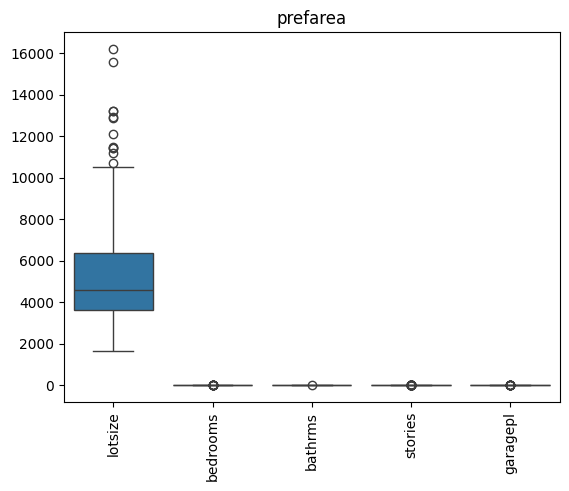

In [50]:
for i in X.columns:
    sns.boxplot(data=X)
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()